In [11]:
import pandas as pd

# Configure csv file from database and load data frame


In [85]:
import os
import sqlite3
import csv

from dotenv import load_dotenv

load_dotenv()

connection = sqlite3.connect(f"../{os.getenv('DB_NAME')}")
cursor = connection.cursor()
with open("dou.csv", "w+", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)    

    column_names = ["Title", "Publish Date", "Experience", "Company", "Description", "Place", "Salary", "Technologies"]
    writer.writerow(column_names)
    
    cursor.execute(f"SELECT * FROM {os.getenv('TABLE_NAME')}")
    writer.writerows(cursor.fetchall())
    
connection.close()

In [86]:
dou_stat = pd.DataFrame(pd.read_csv("dou.csv"))

# Top 5 hiring companies right now
Companies statistic that has the biggest number of vacancies on Dou


In [87]:
dou_stat["Vacancies Count"] = dou_stat.groupby("Company")["Title"].transform("count")

<Axes: title={'center': 'Top hiring companies right now'}, xlabel='Company', ylabel='Vacancies count'>

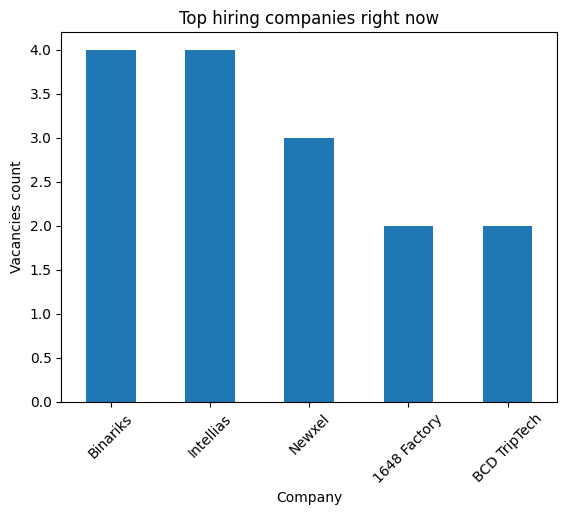

In [88]:
vacancy_counts = dou_stat.groupby("Company")["Vacancies Count"].first()
top_hiring_companies = vacancy_counts[vacancy_counts > 1].nlargest(5)

top_hiring_companies.plot.bar(title="Top hiring companies right now", ylabel="Vacancies count", rot=45)

# Number of vacancies for experience years

<Axes: title={'center': 'Number of vacancies for experience years'}, xlabel='Experience years', ylabel='Vacancies'>

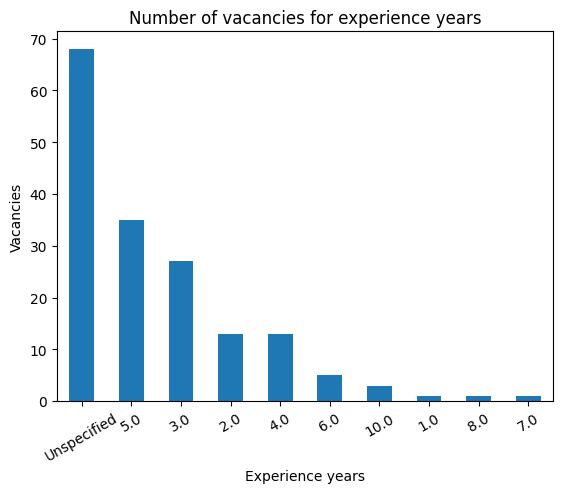

In [142]:
dou_stat_copy = dou_stat

dou_stat_copy["Experience"] = dou_stat_copy["Experience"].fillna("Unspecified")
experience_count = dou_stat_copy.groupby("Experience")["Experience"].count()
experience_count.sort_values(ascending=False).plot.bar(title="Number of vacancies for experience years", xlabel="Experience years", ylabel="Vacancies", rot=30)

# Top of technologies per vacancy

<Axes: title={'center': 'Number of Vacancies by Technology'}, xlabel='Technology', ylabel='Vacancy Count'>

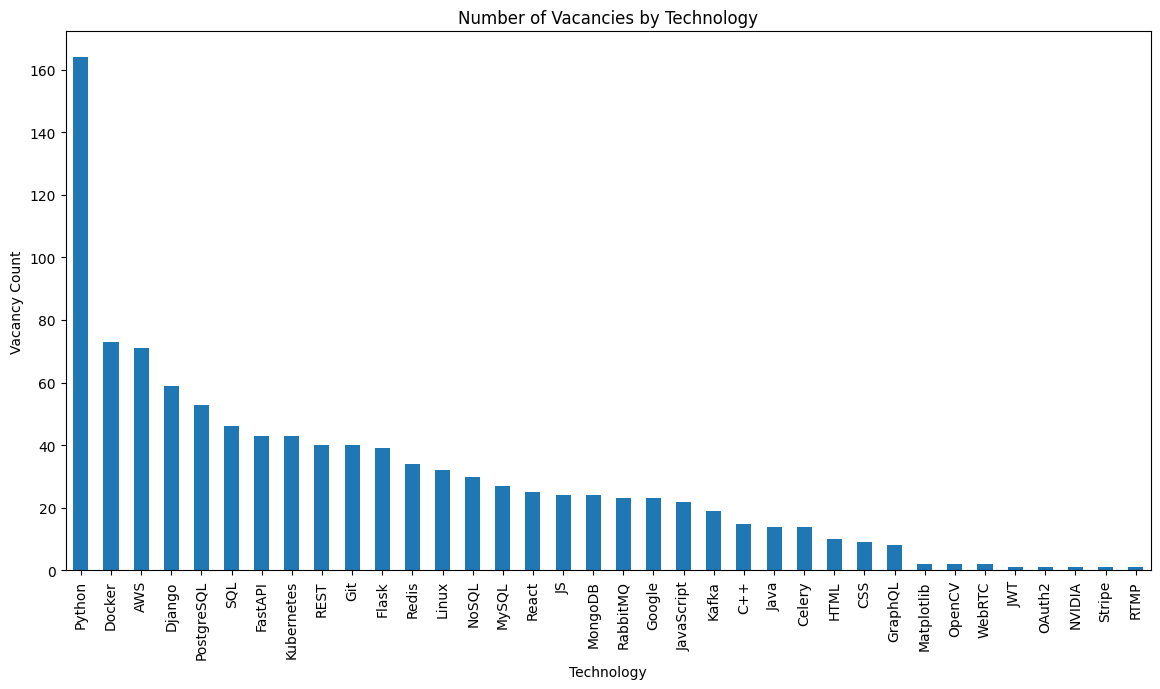

In [165]:
all_technologies = [tech for techno in dou_stat["Technologies"] if pd.notna(techno) for tech in techno.split(", ")]
unique_technologies = list(set(all_technologies))

dou_columns = ["Title", "Experience", "Company", "Salary"]
result_df = dou_stat[dou_columns].copy()

for tech in unique_technologies:
    result_df[tech] = dou_stat["Technologies"].apply(lambda x: 1 if pd.notna(x) and tech in x.split(", ") else 0)

technology_counts = result_df[unique_technologies].sum().sort_values(ascending=False)

technology_counts_df = technology_counts.reset_index()
technology_counts_df.columns = ["Technology", "Vacancy Count"]

technology_counts_df.plot.bar(x="Technology", y="Vacancy Count", legend=False, figsize=(14, 7), title="Number of Vacancies by Technology", ylabel="Vacancy Count")

# Number of vacancies by place

<Axes: title={'center': 'Number of vacancies by place'}, ylabel='Vacancy Count'>

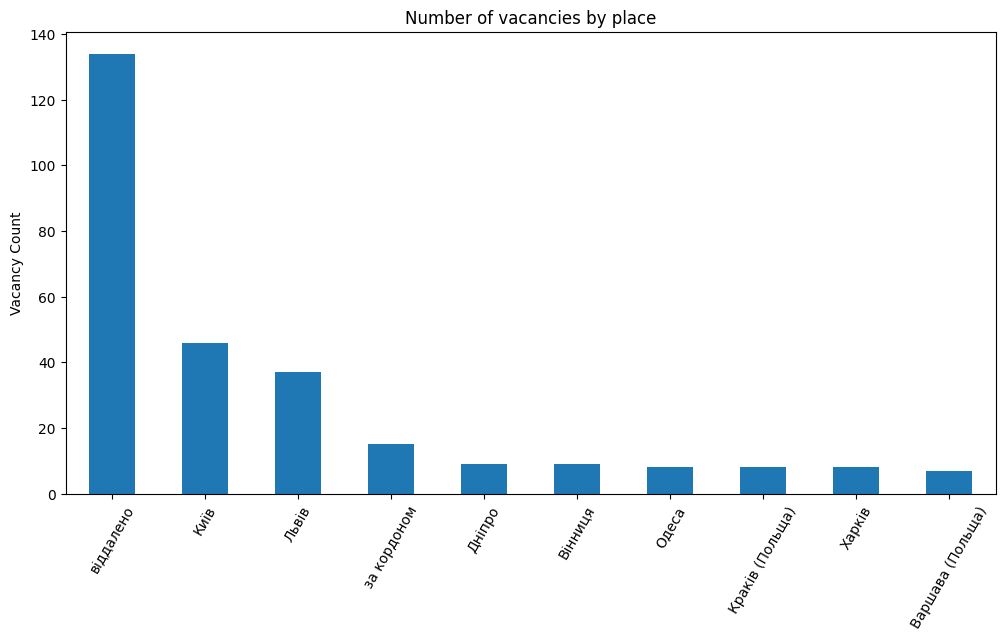

In [163]:
all_places = [city.strip() for place in dou_stat["Place"] if pd.notna(place) for city in place.split(", ")]
unique_places = list(set(all_places))

places_df = dou_stat[["Title", "Experience", "Company"]].copy()

for city in unique_places:
    places_df[city] = dou_stat["Place"].apply(
        lambda x: 1 if pd.notna(x) and any(city == part.strip() for part in x.split(", ")) else 0
    )

city_counts = places_df[unique_places].sum().sort_values(ascending=False)
city_counts_df = city_counts.reset_index()
city_counts_df.columns = ["Place", "Vacancy Count"]
city_counts.nlargest(10).plot.bar(x="Place", y="Vacancy Count", legend=False, figsize=(12, 6), title="Number of vacancies by place", ylabel="Vacancy Count", rot=60)